In [3]:
import numpy as np
import matplotlib.pyplot as plt

def smooth(y, radius=60, mode='two_sided'):
    if len(y) < 2*radius+1:
        return np.ones_like(y) * y.mean()
    elif mode == 'two_sided':
        convkernel = np.ones(2 * radius+1)
        return np.convolve(y, convkernel, mode='same') / \
               np.convolve(np.ones_like(y), convkernel, mode='same')
    elif mode == 'causal':
        convkernel = np.ones(radius)
        out = np.convolve(y, convkernel,mode='full') / \
              np.convolve(np.ones_like(y), convkernel, mode='full')
        return out[:-radius+1]

import json

def load_data(file_name):
    print(file_name)
    
    data = json.load( open(file_name))
    print(data.keys())
    return data

./data/Safexp-PointGoal1-v0_ppo.json
dict_keys(['time_step', 'avg_length', 'running_reward', 'running_cost'])


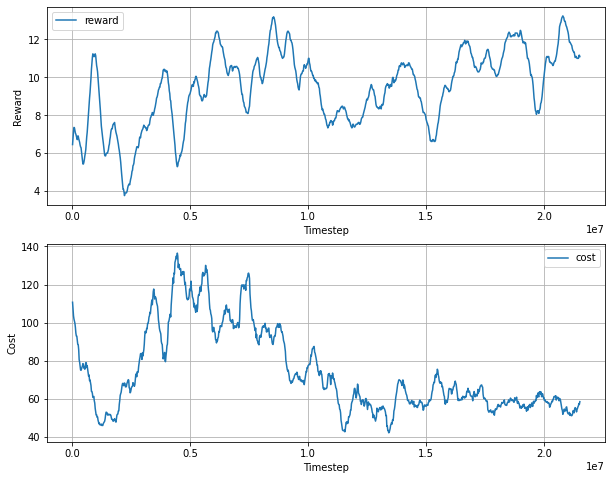

./data/Safexp-PointGoal1-v0_mp_ppo.json
dict_keys(['time_step', 'avg_length', 'running_reward', 'running_cost'])


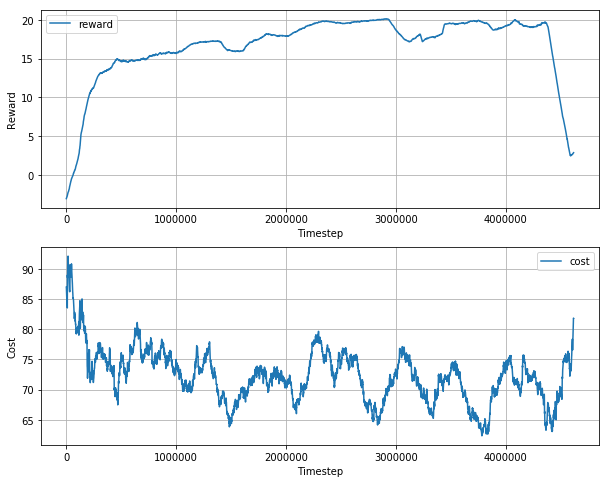

In [12]:
env_name = "Safexp-PointGoal1-v0"
data_file_path = f'./data/{env_name}_mp_ppo.json'
data = load_data(data_file_path)

fig, axs = plt.subplots(2, figsize=(10,8))
timesteps_per_epi = 1000

axs[0].plot(np.array(data['time_step'])*timesteps_per_epi, smooth(data['running_reward'], radius=100), label='reward')
axs[0].set_xlabel('Timestep')
axs[0].set_ylabel('Reward')
axs[0].legend()
axs[0].grid()

axs[1].plot(np.array(data['time_step'])*timesteps_per_epi, smooth(data['running_cost'], radius=100), label='cost')
axs[1].set_xlabel('Timestep')
axs[1].set_ylabel('Cost')
axs[1].legend()
axs[1].grid()

plt.savefig('img/{env_name}_ppo.pdf')

./data/Safexp-PointGoal1-v0_mp_safe_ppo.json
dict_keys(['time_step', 'avg_length', 'running_reward', 'running_cost'])


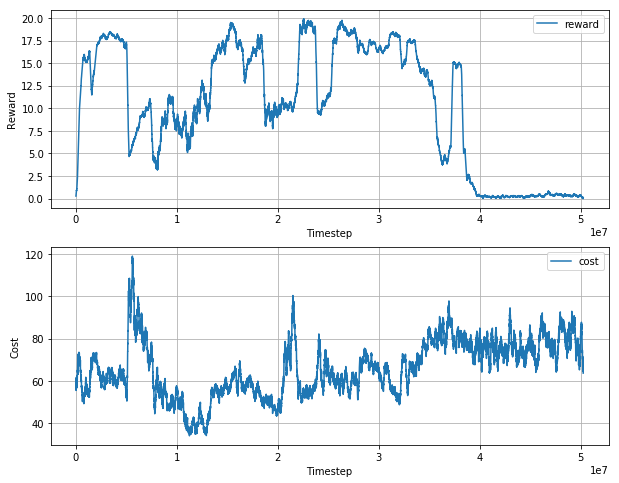

In [8]:
env_name = "Safexp-PointGoal1-v0"
data_file_path = f'./data/{env_name}_mp_safe_ppo.json'
data = load_data(data_file_path)

fig, axs = plt.subplots(2, figsize=(10,8))
timesteps_per_epi = 1000

axs[0].plot(np.array(data['time_step'])*timesteps_per_epi, smooth(data['running_reward'], radius=100), label='reward')
axs[0].set_xlabel('Timestep')
axs[0].set_ylabel('Reward')
axs[0].legend()
axs[0].grid()

axs[1].plot(np.array(data['time_step'])*timesteps_per_epi, smooth(data['running_cost'], radius=100), label='cost')
axs[1].set_xlabel('Timestep')
axs[1].set_ylabel('Cost')
axs[1].legend()
axs[1].grid()

plt.savefig('img/{env_name}_safe_ppo.pdf')

## New PPO

      episode  timestep   reward     cost
0          19     20000  -2.9932 -46.4211
1          39     40000  -3.1243 -35.5000
2          59     60000  -0.6707 -44.9000
3          79     80000  -0.7409 -49.9500
4          99    100000   0.8252 -80.4000
...       ...       ...      ...      ...
1090    21819  21820000  25.5534 -53.8000
1091    21839  21840000  25.4313 -43.3500
1092    21859  21860000  25.1910 -48.0000
1093    21879  21880000  25.2669 -45.4000
1094    21899  21900000  25.2147 -61.9000

[1095 rows x 4 columns]
(1095,) (1095,)


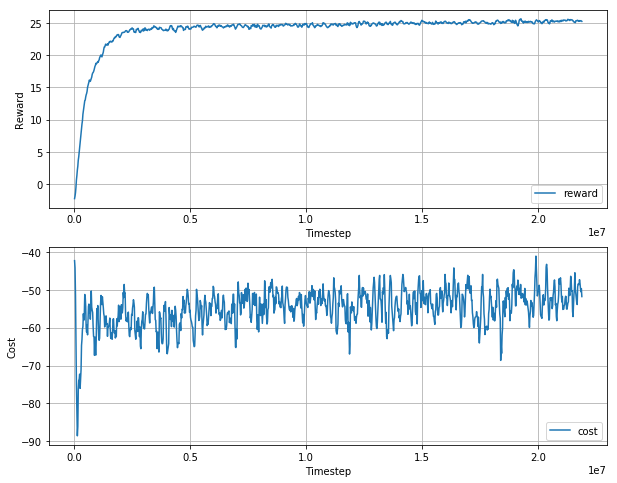

In [32]:
import pandas as pd

env_name = "Safexp-PointGoal1-v0"
num = 0
data_file_path = f'./log/{env_name}/PPO_{env_name}_log_{num}.csv'
data = pd.read_csv(data_file_path)
data = pd.DataFrame(data)
print(data)
print(data['reward'].shape, data['timestep'].shape)

fig, axs = plt.subplots(2, figsize=(10,8))

axs[0].plot(np.array(data['timestep']), smooth(data['reward'], radius=2), label='reward')
axs[0].set_xlabel('Timestep')
axs[0].set_ylabel('Reward')
axs[0].legend()
axs[0].grid()

axs[1].plot(np.array(data['timestep']), smooth(data['cost'], radius=2), label='cost')
axs[1].set_xlabel('Timestep')
axs[1].set_ylabel('Cost')
axs[1].legend()
axs[1].grid()

plt.savefig('img/{env_name}_ppo2.pdf')

     episode  timestep  reward      cost
0         19     20000 -0.2135 -117.2105
1         39     40000 -0.0897  -80.9000
2         59     60000  0.2183  -73.9000
3         79     80000 -0.4480  -71.3500
4         99    100000 -0.1483  -48.3500
..       ...       ...     ...       ...
934    18699  18700000  0.4726  -65.9500
935    18719  18720000 -0.4819  -23.5500
936    18739  18740000 -0.2700  -12.4500
937    18759  18760000 -0.5607  -29.3500
938    18779  18780000 -0.6937  -14.2500

[939 rows x 4 columns]
(939,) (939,)


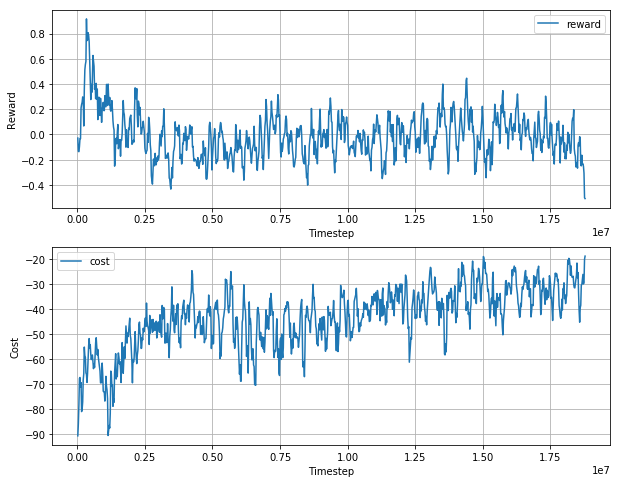

In [36]:
import pandas as pd

env_name = "Safexp-PointGoal1-v0"
num = 1
data_file_path = f'./log/{env_name}/safe_PPO_{env_name}_log_{num}.csv'
data = pd.read_csv(data_file_path)
data = pd.DataFrame(data)
print(data)
print(data['reward'].shape, data['timestep'].shape)

fig, axs = plt.subplots(2, figsize=(10,8))

axs[0].plot(np.array(data['timestep']), smooth(data['reward'], radius=2), label='reward')
axs[0].set_xlabel('Timestep')
axs[0].set_ylabel('Reward')
axs[0].legend()
axs[0].grid()

axs[1].plot(np.array(data['timestep']), smooth(data['cost'], radius=2), label='cost')
axs[1].set_xlabel('Timestep')
axs[1].set_ylabel('Cost')
axs[1].legend()
axs[1].grid()

plt.savefig('img/{env_name}_safe_ppo2.pdf')

      episode  timestep  reward   cost
0           1      2000 -3.3104    0.0
1           3      4000  0.1156    0.0
2           5      6000 -2.9320  -73.0
3           7      8000  0.3641 -103.0
4           9     10000 -1.1487  -23.0
...       ...       ...     ...    ...
3472     6945   6946000 -1.4526    0.0
3473     6947   6948000  0.7172    0.0
3474     6949   6950000  5.6586  -52.0
3475     6951   6952000  1.2601    0.0
3476     6953   6954000  2.5385    0.0

[3477 rows x 4 columns]
(3477,) (3477,)


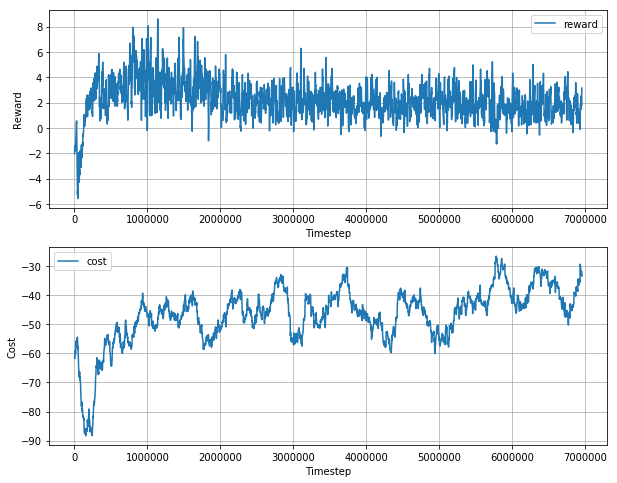

In [50]:
import pandas as pd

env_name = "Safexp-PointGoal1-v0"
num = 3
data_file_path = f'./log/{env_name}/safe_PPO_{env_name}_log_{num}.csv'
data = pd.read_csv(data_file_path)
data = pd.DataFrame(data)
print(data)
print(data['reward'].shape, data['timestep'].shape)

fig, axs = plt.subplots(2, figsize=(10,8))

axs[0].plot(np.array(data['timestep']), smooth(data['reward'], radius=2), label='reward')
axs[0].set_xlabel('Timestep')
axs[0].set_ylabel('Reward')
axs[0].legend()
axs[0].grid()

axs[1].plot(np.array(data['timestep']), smooth(data['cost'], radius=50), label='cost')
axs[1].set_xlabel('Timestep')
axs[1].set_ylabel('Cost')
axs[1].legend()
axs[1].grid()

plt.savefig('img/{env_name}_safe_ppo{num}.pdf')

      episode  timestep  reward   cost
0           1      2000  0.3852  -20.0
1           3      4000  0.0591 -148.0
2           5      6000 -0.2646    0.0
3           7      8000 -0.7944    0.0
4           9     10000  0.7382  -73.0
...       ...       ...     ...    ...
9205    18411  18412000  7.0194  -72.5
9206    18413  18414000  2.6050 -150.5
9207    18415  18416000  3.5987  -76.5
9208    18417  18418000  3.0913  -51.5
9209    18419  18420000  3.9399  -18.0

[9210 rows x 4 columns]
(9210,) (9210,)


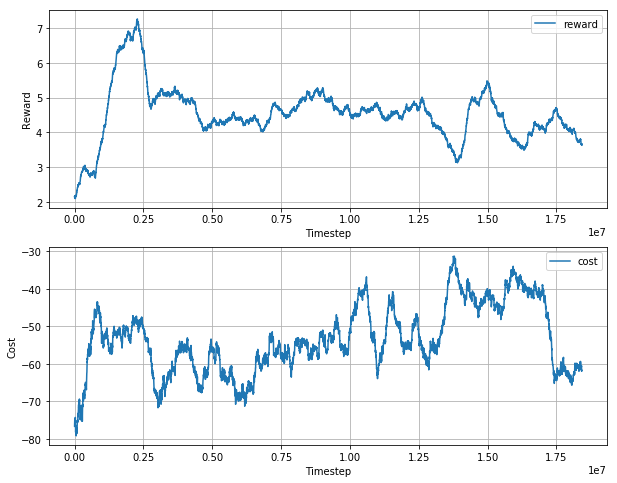

In [59]:
import pandas as pd

env_name = "Safexp-PointGoal1-v0"
num = 7
cnt = 250000
data_file_path = f'./log/{env_name}/safe_PPO_{env_name}_log_{num}.csv'
data = pd.read_csv(data_file_path)
data = pd.DataFrame(data)
print(data)
print(data['reward'].shape, data['timestep'].shape)

fig, axs = plt.subplots(2, figsize=(10,8))

axs[0].plot(np.array(data['timestep'])[:cnt], smooth(data['reward'][:cnt], radius=100), label='reward')
axs[0].set_xlabel('Timestep')
axs[0].set_ylabel('Reward')
axs[0].legend()
axs[0].grid()

axs[1].plot(np.array(data['timestep'])[:cnt], smooth(data['cost'][:cnt], radius=100), label='cost')
axs[1].set_xlabel('Timestep')
axs[1].set_ylabel('Cost')
axs[1].legend()
axs[1].grid()

plt.savefig('img/{env_name}_safe_ppo{num}.pdf')

      episode  timestep   reward   cost
0           1      2000   0.3852  -20.0
1           3      4000   0.0591 -148.0
2           5      6000  -0.0833 -118.0
3           7      8000  -0.4367    0.0
4           9     10000   1.6470  -10.0
...       ...       ...      ...    ...
1366     2733   2734000  14.3687  -57.5
1367     2735   2736000  -1.2703    0.0
1368     2737   2738000   3.6343  -40.5
1369     2739   2740000   1.1983 -132.0
1370     2741   2742000  -0.7057  -15.5

[1371 rows x 4 columns]
(1371,) (1371,)


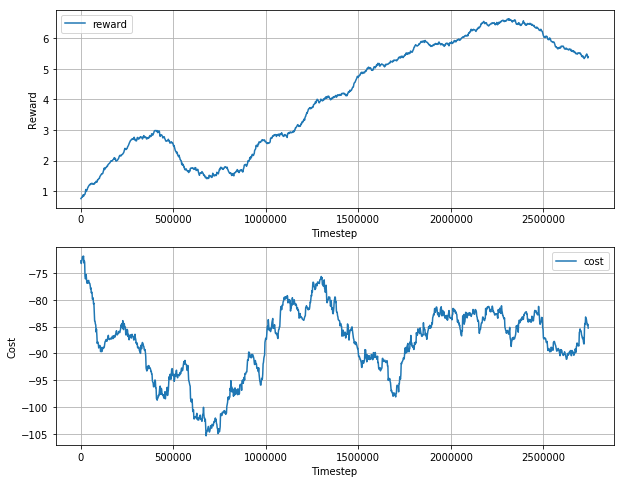

In [85]:
import pandas as pd

env_name = "Safexp-PointGoal1-v0"
num = 8
cnt = 250000
data_file_path = f'./log/{env_name}/safe_PPO_{env_name}_log_{num}.csv'
data = pd.read_csv(data_file_path)
data = pd.DataFrame(data)
print(data)
print(data['reward'].shape, data['timestep'].shape)

fig, axs = plt.subplots(2, figsize=(10,8))

axs[0].plot(np.array(data['timestep'])[:cnt], smooth(data['reward'][:cnt], radius=100), label='reward')
axs[0].set_xlabel('Timestep')
axs[0].set_ylabel('Reward')
axs[0].legend()
axs[0].grid()

axs[1].plot(np.array(data['timestep'])[:cnt], smooth(data['cost'][:cnt], radius=100), label='cost')
axs[1].set_xlabel('Timestep')
axs[1].set_ylabel('Cost')
axs[1].legend()
axs[1].grid()

plt.savefig('img/{env_name}_safe_ppo{num}.pdf')

      episode  timestep   reward   cost
0           1      2000   0.3852  -20.0
1           3      4000   0.0591 -148.0
2           5      6000   0.1502 -143.5
3           7      8000   0.4892  -88.0
4           9     10000   1.5642   -5.5
...       ...       ...      ...    ...
9190    18381  18382000  19.9985   -4.5
9191    18383  18384000  21.0832  -63.0
9192    18385  18386000  21.5643  -43.5
9193    18387  18388000  21.6207  -60.5
9194    18389  18390000  19.5758  -45.0

[9195 rows x 4 columns]
(9195,) (9195,)
      episode  timestep  reward   cost
0           1      2000  0.3852  -20.0
1           3      4000  0.0591 -148.0
2           5      6000 -0.2646    0.0
3           7      8000 -0.7944    0.0
4           9     10000  0.7382  -73.0
...       ...       ...     ...    ...
9205    18411  18412000  7.0194  -72.5
9206    18413  18414000  2.6050 -150.5
9207    18415  18416000  3.5987  -76.5
9208    18417  18418000  3.0913  -51.5
9209    18419  18420000  3.9399  -18.0

[9210 rows

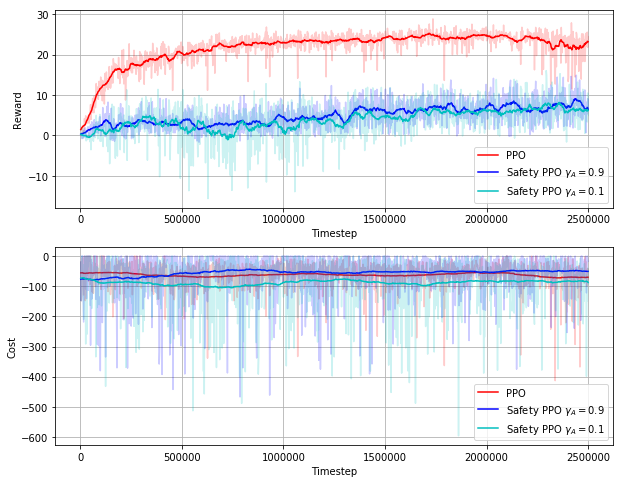

In [99]:
import torch
import numpy as np
mean=torch.FloatTensor(np.array([1,1]))
std=torch.FloatTensor(np.array([1,1]))

pi = torch.distributions.Normal(mean, std)
a = pi.sample()[0]